![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Cookbook 2: Pandas Introduction with Stock Data

**Author list:** Ikhlaq Sidhu

**References / Sources:** 


**License Agreement:** Feel free to do whatever you want with this code

___

*This notebook is an introduction to Pandas with connections to Numpy*

## Pandas Intro
### Creating a Data Frame


**Key Points:** Pandas has Series (like Arrays), DataFrames (like Tables), and Panels (3D version=.  


In [1]:
import pandas as pd
import numpy as np

### Goal: Learn that it is easy to create a data frame

#### We use pandas.DataFrame and put in just about anything data type as an argument

class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)[source]

data : numpy ndarray (structured or homogeneous), dict, or DataFrame. 
Dict can contain Series, arrays, constants, or list-like objects

In [4]:
# Try it with an array
a1 = np.array(np.random.randn(3))
a2 = np.array(np.random.randn(3))
a3 = np.array(np.random.randn(3))

print(a1, type(a1))
print(a2)
print(a3)

df0 = pd.DataFrame(a1)
print("This is a dataframe")
df0


[-0.30437842  1.14829195  0.39404276] <class 'numpy.ndarray'>
[ 0.33998399 -0.99659453  1.13465078]
[-0.09532637 -1.07659722 -0.44835838]
This is a dataframe


,0
0,-0.304378
1,1.148292
2,0.394043


In [5]:
# What if I give it a list of np arrays?
df0 = pd.DataFrame([a1, a2, a3])
print(type(df0))
df0
# notice that there is no column label and the index is set automatically

<class 'pandas.core.frame.DataFrame'>


,0,1,2
0,-0.304378,1.148292,0.394043
1,0.339984,-0.996595,1.134651
2,-0.095326,-1.076597,-0.448358


In [6]:
# Let use a 2-D arrays?
ax = np.array(np.random.randn(9)).reshape(3,3)
print(ax)
df0 = pd.DataFrame(ax)
df0

[[-0.55511805 -0.57345526  2.25590239]
 [ 0.78258254  0.57170543  0.14355255]
 [ 0.01997603 -1.28884413  0.49411364]]


,0,1,2
0,-0.555118,-0.573455,2.255902
1,0.782583,0.571705,0.143553
2,0.019976,-1.288844,0.494114


In [8]:
# And now, lets use a dictionary as input

dict1 = {'A':a1, 'B':a2}
df1 = pd.DataFrame(dict1) 

df1
# note headings



,A,B
0,-0.304378,0.339984
1,1.148292,-0.996595
2,0.394043,1.134651


In [10]:
# Lets add another column
df1['C']=a3
df1

,A,B,C
0,-0.304378,0.339984,-0.095326
1,1.148292,-0.996595,-1.076597
2,0.394043,1.134651,-0.448358


In [12]:
# What is we assign a list instead of numpy array?
df1['L'] = ["List", "of", "words"]
print("The column L is a ",type (df1['L']))
df1

The column L is a  <class 'pandas.core.series.Series'>


,A,B,C,L
0,-0.304378,0.339984,-0.095326,List
1,1.148292,-0.996595,-1.076597,of
2,0.394043,1.134651,-0.448358,words


In [13]:
# Introducing a pandas.Series
# Its like an np.array but it has its own index
s = pd.Series([1,np.nan,3])
s2 = pd.Series([2, 3, 4], index = ['a','b','c'])
print(s)
print(s2)

0    1.0
1    NaN
2    3.0
dtype: float64
a    2
b    3
c    4
dtype: int64


In [14]:
# We will add the Series s to the table as column S
df1['S'] = s
df1

,A,B,C,L,S
0,-0.304378,0.339984,-0.095326,List,1.0
1,1.148292,-0.996595,-1.076597,of,NaN
2,0.394043,1.134651,-0.448358,words,3.0


In [15]:
# This time, we will Series s2, which has a different index
df1['S2']=s2
print(df1)

# But if we create a new dataframe, we can add the data but with the new index
df2 = pd.DataFrame(s2)
df2['A']= a1
df2['B']=a2
df2['C']=a3
print(df2)

          A         B         C      L    S  S2
0 -0.304378  0.339984 -0.095326   List  1.0 NaN
1  1.148292 -0.996595 -1.076597     of  NaN NaN
2  0.394043  1.134651 -0.448358  words  3.0 NaN
   0         A         B         C
a  2 -0.304378  0.339984 -0.095326
b  3  1.148292 -0.996595 -1.076597
c  4  0.394043  1.134651 -0.448358


In [16]:
# You can then extract rows by position or label
print(df2[1:3])
print(df2['a':'b'])

   0         A         B         C
b  3  1.148292 -0.996595 -1.076597
c  4  0.394043  1.134651 -0.448358
   0         A         B         C
a  2 -0.304378  0.339984 -0.095326
b  3  1.148292 -0.996595 -1.076597


In [17]:
# recall
df1

,A,B,C,L,S,S2
0,-0.304378,0.339984,-0.095326,List,1.0,NaN
1,1.148292,-0.996595,-1.076597,of,NaN,NaN
2,0.394043,1.134651,-0.448358,words,3.0,NaN


In [18]:
# Renaming a column
df1 = df1.rename(columns = {'L':'D'})
df1

,A,B,C,D,S,S2
0,-0.304378,0.339984,-0.095326,List,1.0,NaN
1,1.148292,-0.996595,-1.076597,of,NaN,NaN
2,0.394043,1.134651,-0.448358,words,3.0,NaN


In [19]:
# And delete column
del df1['S2']
df1

,A,B,C,D,S
0,-0.304378,0.339984,-0.095326,List,1.0
1,1.148292,-0.996595,-1.076597,of,NaN
2,0.394043,1.134651,-0.448358,words,3.0


In [20]:
# Example: view only a column
print(df1['A'])
print
# A list of colums
print(df1[['A','D']])
print 
print(type(df1['A']))

# Notice the data structure of the column is a Series, not an array


0   -0.304378
1    1.148292
2    0.394043
Name: A, dtype: float64
          A      D
0 -0.304378   List
1  1.148292     of
2  0.394043  words
<class 'pandas.core.series.Series'>


In the 10 min Pandas Guide, you will see many ways to view, slice a dataframe

* view/slice by rows, eg df[1:3], etc.

* view by index location, see df.iloc (iloc)

* view by ranges of labels, ie index label 2 to 5, or dates feb 3 to feb 25, see df.loc (loc)
 
* view a single row by the index df.xs (xs)

* filtering rows that have certain conditions
* add column
* add row

* How to change the index

and more...

In [21]:
df1[0:2]  # ok
# df1[1]  # not ok

#What will this do?
# print df1[0:2]
# print df1[0:2][0:1]




,A,B,C,D,S
0,-0.304378,0.339984,-0.095326,List,1.0
1,1.148292,-0.996595,-1.076597,of,NaN


## Finance example

### Now, lets get some data from Yahoo finance.  One format to get a CSV file is like this:

http://chart.finance.yahoo.com/table.csv?s=YHOO&a=8&b=21&c=2015&d=8&e=21&f=2016&g=d&ignore=.csv

#### Notes:
#### s = stock symbol
#### a= from month
#### b = from date
#### c = from year
#### d = to month
#### e = to date
#### f = to year


In [ ]:
# Lets download Yahoo historic stock prices, one year back from 8/21/2016
# See https://www.quantshare.com/sa-43-10-ways-to-download-historical-stock-quotes-data-for-free

In [22]:
# We can use this 'pd.read_csv' method with the yahoo url
df0_yhoo = pd.read_csv('http://chart.finance.yahoo.com/table.csv?s=YHOO&a=8&b=21&c=2015&d=8&e=21&f=2016&g=d&ignore=.csv')

In [23]:
# print df0_yhoo.head(10)
df0_yhoo[0:10]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-09-21,42.889999,44.220001,42.889999,44.139999,12313700,44.139999
1,2016-09-20,43.240002,43.389999,42.660000,42.790001,9788900,42.790001
2,2016-09-19,43.919998,43.950001,43.000000,43.189999,7887400,43.189999
3,2016-09-16,43.939999,44.020000,43.470001,43.669998,19093900,43.669998
4,2016-09-15,43.410000,44.049999,43.220001,43.990002,12533900,43.990002
5,2016-09-14,42.910000,43.619999,42.860001,43.459999,11617300,43.459999
6,2016-09-13,43.189999,43.520000,42.689999,43.040001,10132000,43.040001
7,2016-09-12,42.279999,43.650002,42.180000,43.459999,10808800,43.459999
8,2016-09-09,43.919998,44.150002,42.820000,42.919998,12060700,42.919998
9,2016-09-08,44.070000,44.720001,44.029999,44.360001,7882600,44.360001


In [24]:
# We can do the same for Google, Apple, and Facebook
df0_goog = pd.read_csv('http://chart.finance.yahoo.com/table.csv?s=GOOG&a=8&b=21&c=2015&d=8&e=21&f=2016&g=d&ignore=.csv')
df0_aapl = pd.read_csv('http://chart.finance.yahoo.com/table.csv?s=AAPL&a=8&b=21&c=2015&d=8&e=21&f=2016&g=d&ignore=.csv')
df0_fb = pd.read_csv('http://chart.finance.yahoo.com/table.csv?s=FB&a=8&b=21&c=2015&d=8&e=21&f=2016&g=d&ignore=.csv')

In [25]:
# Lets print the 1 column, which show close prices of Google
# This is a new data frame (like a new table)
df0_goog['Close']

0      776.219971
1      771.409973
2      765.700012
3      768.880005
4      771.760010
5      762.489990
6      759.690002
7      769.020020
8      759.659973
9      775.320007
10     780.349976
11     780.080017
12     771.460022
13     768.780029
14     767.049988
15     769.090027
16     772.150024
17     769.539978
18     769.409973
19     769.640015
20     772.080017
21     772.150024
22     775.419983
23     777.500000
24     779.909973
25     777.140015
26     782.440002
27     783.219971
28     784.849976
29     784.679993
          ...    
224    710.809998
225    716.919983
226    712.950012
227    708.489990
228    712.780029
229    702.000000
230    651.789978
231    642.609985
232    650.280029
233    666.099976
234    662.200012
235    661.739990
236    651.159973
237    652.299988
238    646.669983
239    643.609985
240    639.159973
241    642.359985
242    645.440002
243    641.469971
244    626.909973
245    611.289978
246    608.419983
247    594.969971
248    594

In [26]:
# Lets print the 2 column, and only 10 down, which show close prices of Google
# Instead of one column name, we have a python list ['Date',Close']
df0_goog[['Date','Close']][0:10]

,Date,Close
0,2016-09-21,776.219971
1,2016-09-20,771.409973
2,2016-09-19,765.700012
3,2016-09-16,768.880005
4,2016-09-15,771.760010
5,2016-09-14,762.489990
6,2016-09-13,759.690002
7,2016-09-12,769.020020
8,2016-09-09,759.659973
9,2016-09-08,775.320007


In [27]:
# Same thing, but this time with Apple, we have each in its own dataframe
df0_aapl[['Date','Close']][0:10]

,Date,Close
0,2016-09-21,113.550003
1,2016-09-20,113.570000
2,2016-09-19,113.580002
3,2016-09-16,114.919998
4,2016-09-15,115.570000
5,2016-09-14,111.769997
6,2016-09-13,107.949997
7,2016-09-12,105.440002
8,2016-09-09,103.129997
9,2016-09-08,105.519997


In [28]:
# But what if we want to use it the data as a Numpy Array?
# We can do that with this pandas method: df.as.martix()
# this will be an n x 2 matrix (axis 0 is long, axis 1 = 2)
# and then slice to show only 10 rows

print(df0_aapl[['Date','Close']].as_matrix()[0:10])
type(df0_aapl[['Date','Close']].as_matrix()[0:10])

[['2016-09-21' 113.550003]
 ['2016-09-20' 113.57]
 ['2016-09-19' 113.58000200000001]
 ['2016-09-16' 114.91999799999999]
 ['2016-09-15' 115.57]
 ['2016-09-14' 111.769997]
 ['2016-09-13' 107.949997]
 ['2016-09-12' 105.440002]
 ['2016-09-09' 103.129997]
 ['2016-09-08' 105.519997]]


numpy.ndarray

In [29]:
# And what if we only want to have a single column as a vector, a nump array with dimension 1 x n
df0_aapl['Close'][0:10].as_matrix()

array([ 113.550003,  113.57    ,  113.580002,  114.919998,  115.57    ,
        111.769997,  107.949997,  105.440002,  103.129997,  105.519997])

In [30]:
# Lets get the all the last closing prices of each of the stocks into NumPy arrays:

a = df0_aapl['Close'].as_matrix()
g = df0_goog['Close'].as_matrix()
f = df0_fb['Close'].as_matrix()

# Lets get the last 20 closing prices of each of the stocks into NumPy arrays:
a20 = df0_aapl['Close'][0:20].as_matrix()
g20 = df0_goog['Close'][0:20].as_matrix()
f20 = df0_fb['Close'][0:20].as_matrix()


In [32]:
print(a20, g20, f20)

[ 113.550003  113.57      113.580002  114.919998  115.57      111.769997
  107.949997  105.440002  103.129997  105.519997  108.360001  107.699997
  107.730003  106.730003  106.099998  106.        106.82      106.940002
  107.57      108.029999] [ 776.219971  771.409973  765.700012  768.880005  771.76001   762.48999
  759.690002  769.02002   759.659973  775.320007  780.349976  780.080017
  771.460022  768.780029  767.049988  769.090027  772.150024  769.539978
  769.409973  769.640015] [ 129.940002  128.639999  128.649994  129.070007  128.350006  127.769997
  127.209999  128.690002  127.099998  130.270004  131.050003  129.729996
  126.510002  126.169998  126.120003  125.839996  126.540001  124.959999
  123.889999  123.480003]


In [33]:
# Manipulating stock prices in Numpy Arrays:
mi = (a+g+f)/3   # mean_instantaneous average value on every day
print(mi[0:20])

[ 339.90332533  337.873324    335.97666933  337.62333667  338.56000533
  334.00999467  331.616666    334.38334133  329.96332267  337.03666933
  339.91999333  339.17000333  335.23334233  333.89334333  333.08999633
  333.643341    335.17000833  333.81332633  333.623324    333.71667233]


In [35]:
# And now the same thing, but using Pandas and not NumPy
# Lets merge some tables
df_all = df0_aapl[['Date','Close']].merge(df0_goog[['Date','Close']], on = 'Date' )
df_all = df_all.merge(df0_fb[['Date','Close']], on = 'Date' )
print(df_all[0:10])

         Date     Close_x     Close_y       Close
0  2016-09-21  113.550003  776.219971  129.940002
1  2016-09-20  113.570000  771.409973  128.639999
2  2016-09-19  113.580002  765.700012  128.649994
3  2016-09-16  114.919998  768.880005  129.070007
4  2016-09-15  115.570000  771.760010  128.350006
5  2016-09-14  111.769997  762.489990  127.769997
6  2016-09-13  107.949997  759.690002  127.209999
7  2016-09-12  105.440002  769.020020  128.690002
8  2016-09-09  103.129997  759.659973  127.099998
9  2016-09-08  105.519997  775.320007  130.270004


In [36]:
# Renaming Columns
# df.rename(columns={'Leader': 'Commander'}, inplace=True)

df_all = df_all.rename(columns = {'Close_x':'AAPL'})
df_all = df_all.rename(columns = {'Close_y':'GOOG'})
df_all = df_all.rename(columns = {'Close':'FB'})
print(df_all[0:10])

         Date        AAPL        GOOG          FB
0  2016-09-21  113.550003  776.219971  129.940002
1  2016-09-20  113.570000  771.409973  128.639999
2  2016-09-19  113.580002  765.700012  128.649994
3  2016-09-16  114.919998  768.880005  129.070007
4  2016-09-15  115.570000  771.760010  128.350006
5  2016-09-14  111.769997  762.489990  127.769997
6  2016-09-13  107.949997  759.690002  127.209999
7  2016-09-12  105.440002  769.020020  128.690002
8  2016-09-09  103.129997  759.659973  127.099998
9  2016-09-08  105.519997  775.320007  130.270004


In [37]:
# And now for the average
df_all['Ave'] = (df_all['AAPL'] + df_all['GOOG'] + df_all['FB'])/3
print(df_all[0:10])

         Date        AAPL        GOOG          FB         Ave
0  2016-09-21  113.550003  776.219971  129.940002  339.903325
1  2016-09-20  113.570000  771.409973  128.639999  337.873324
2  2016-09-19  113.580002  765.700012  128.649994  335.976669
3  2016-09-16  114.919998  768.880005  129.070007  337.623337
4  2016-09-15  115.570000  771.760010  128.350006  338.560005
5  2016-09-14  111.769997  762.489990  127.769997  334.009995
6  2016-09-13  107.949997  759.690002  127.209999  331.616666
7  2016-09-12  105.440002  769.020020  128.690002  334.383341
8  2016-09-09  103.129997  759.659973  127.099998  329.963323
9  2016-09-08  105.519997  775.320007  130.270004  337.036669


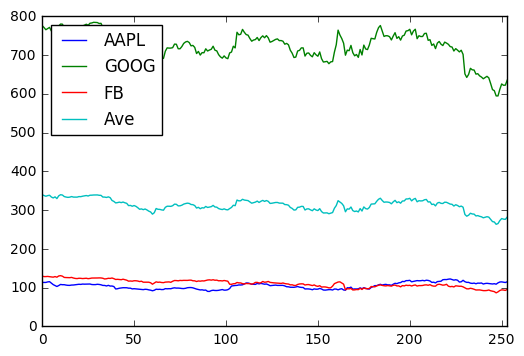

In [38]:
%matplotlib inline
import matplotlib
df_all.plot()